In [3]:
import json
import csv

import numpy as np
import pandas as pd

import seaborn as sns
print(sns.__version__)

from utils import *
%load_ext autoreload
%autoreload 2

%matplotlib inline

import unidecode
from utils import *
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Convert tweet json files to csv

In [6]:
tweet_folder = '/media/storage/RawTweets/'
outpath = 'data/tweets_classified_jan.csv'

#tweet_folder_json_to_csv(tweet_folder, outpath)

## Group tweets by region & filter for keywords

In [7]:
tweets_df = pd.read_csv(outpath)
#regions_df = tweets_df.groupby('placename').apply(filter_tweets)
#regions_df.head()

In [11]:
%%time

def filter_regions(x):
    return pd.Series(dict(num_tweets = x['text'].count(),
                          physical_activity = x['physical_activity'].sum(),
                          sedentary_behavior = x['sedentary_behavior'].sum(),
                          sleep = x['sleep'].sum(),
                          latitude = x['latitude'].mean(),
                          longitude = x['longitude'].mean()))
    
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df.index = tweets_df['created_at']

regions_df = tweets_df.groupby(['placename', pd.TimeGrouper('W')]).apply(filter_regions)

CPU times: user 16min 14s, sys: 0 ns, total: 16min 14s
Wall time: 14min 21s


In [12]:
regions_df.sort_values('num_tweets', ascending=False).head()

latitude  longitude  num_tweets  \
placename        created_at                                     
Toronto, Ontario 2018-01-07  43.691176 -79.382469     71917.0   
                 2017-12-17  43.687688 -79.388232     70556.0   
                 2017-12-24  43.687707 -79.377608     67463.0   
                 2017-11-26  43.683965 -79.384500     65758.0   
                 2018-01-14  43.693586 -79.383588     62955.0   

                             physical_activity  sedentary_behavior   sleep  
placename        created_at                                                 
Toronto, Ontario 2018-01-07             3600.0              3419.0  3664.0  
                 2017-12-17             2940.0              2822.0  3017.0  
                 2017-12-24             3333.0              3237.0  3451.0  
                 2017-11-26             3119.0              3010.0  3174.0  
                 2018-01-14             3157.0              3038.0  3257.0

In [46]:
regions_df.to_csv('./data/regions_weekly_jan.csv')

num_tweets            2666916.0
physical_activity      132820.0
sedentary_behavior     127581.0
sleep                  135785.0
dtype: float64


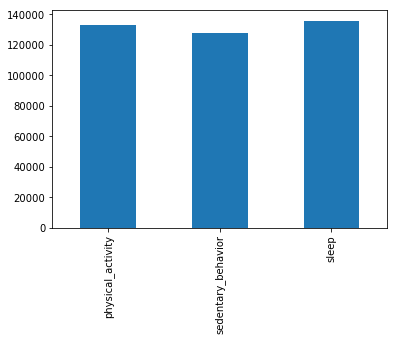

In [31]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'physical_activity':].sum().plot(kind='bar', stacked=True)#.set_xticklabels(['Total tweets', '])

## Compute geolocation for missing regions

In [38]:
regions_df = regions_df.sort_values('num_tweets', ascending=False)
regions_df.head()

latitude  longitude  num_tweets  \
placename        created_at                                     
Toronto, Ontario 2018-01-07  43.691176 -79.382469     71917.0   
                 2017-12-17  43.687688 -79.388232     70556.0   
                 2017-12-24  43.687707 -79.377608     67463.0   
                 2017-11-26  43.683965 -79.384500     65758.0   
                 2018-01-14  43.693586 -79.383588     62955.0   

                             physical_activity  sedentary_behavior   sleep  
placename        created_at                                                 
Toronto, Ontario 2018-01-07             3600.0              3419.0  3664.0  
                 2017-12-17             2940.0              2822.0  3017.0  
                 2017-12-24             3333.0              3237.0  3451.0  
                 2017-11-26             3119.0              3010.0  3174.0  
                 2018-01-14             3157.0              3038.0  3257.0

In [43]:
geocoder.google('Kipling, Saskatchewan')

<[OK] Google - Geocode [Kipling, SK S0G 2S0, Canada]>

In [40]:
regions_df = regions_df.sort_values('num_tweets', ascending=False)
compute_geolocation_regions_geocoder(regions_df)

1130it [00:10, 110.15it/s]

Couldnt locate ('Ontario, Canada', Timestamp('2017-12-31 00:00:00'))


1169it [00:12, 97.26it/s] 

Couldnt locate ('Kensington-Chinatown, Toronto', Timestamp('2017-12-24 00:00:00'))


1215it [00:12, 93.72it/s]

Couldnt locate ('Douro-Dummer, Ontario', Timestamp('2017-11-19 00:00:00'))


1355it [00:16, 83.64it/s]

Couldnt locate ('Kensington-Chinatown, Toronto', Timestamp('2017-12-17 00:00:00'))


1537it [00:22, 68.08it/s]

Couldnt locate ('Douro-Dummer, Ontario', Timestamp('2017-12-10 00:00:00'))


1774it [00:35, 50.32it/s]

Couldnt locate ('Carmacks, Yukon', Timestamp('2017-12-10 00:00:00'))


1793it [00:36, 49.68it/s]

Couldnt locate ('Sud-Ouest, Montréal', Timestamp('2017-12-24 00:00:00'))


1849it [00:37, 49.02it/s]

Couldnt locate ('Air Canada Centre', Timestamp('2017-12-10 00:00:00'))


1933it [00:41, 46.54it/s]

Couldnt locate ('St. Clements, Manitoba', Timestamp('2018-01-07 00:00:00'))


2064it [00:45, 45.43it/s]

Couldnt locate ('Laurentian Valley, Ontario', Timestamp('2018-01-14 00:00:00'))


2170it [00:51, 42.42it/s]

Couldnt locate ('Canada', Timestamp('2017-11-05 00:00:00'))
Couldnt locate ('Verdun, Montréal', Timestamp('2017-12-31 00:00:00'))


2274it [01:00, 37.87it/s]

Couldnt locate ('Greenstone, Ontario', Timestamp('2018-01-07 00:00:00'))


2318it [01:01, 37.58it/s]

Couldnt locate ('Redwater, Alberta', Timestamp('2018-01-14 00:00:00'))


2411it [01:06, 36.50it/s]

Couldnt locate ('St. Clements, Manitoba', Timestamp('2017-12-31 00:00:00'))


2545it [01:14, 34.28it/s]

Couldnt locate ('La Prairie, Québec', Timestamp('2017-11-26 00:00:00'))


2562it [01:15, 34.06it/s]

Couldnt locate ('Tuxedo Park, Calgary', Timestamp('2018-01-07 00:00:00'))


2618it [01:19, 33.03it/s]

Couldnt locate ('Toronto Pearson International Airport (YYZ)', Timestamp('2017-12-10 00:00:00'))


2800it [01:31, 30.55it/s]

Couldnt locate ('Lincoln, New Brunswick', Timestamp('2017-12-17 00:00:00'))


2807it [01:31, 30.59it/s]

Couldnt locate ('Quill Lake, Saskatchewan', Timestamp('2018-01-14 00:00:00'))


2883it [01:38, 29.27it/s]

Couldnt locate ('Quill Lake, Saskatchewan', Timestamp('2017-12-24 00:00:00'))


2921it [01:40, 29.09it/s]

Couldnt locate ('Thompson-Nicola M, British Columbia', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ('Air Canada Centre', Timestamp('2018-01-14 00:00:00'))
Couldnt locate ('Brigus, Newfoundland and Labrador', Timestamp('2017-12-24 00:00:00'))


3046it [01:48, 28.14it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2017-11-26 00:00:00'))
Couldnt locate ('Willner No. 253, Saskatchewan', Timestamp('2018-01-14 00:00:00'))


3161it [01:55, 27.39it/s]

Couldnt locate ('Granview Woodland, Vancouver', Timestamp('2018-01-14 00:00:00'))


3228it [02:00, 26.78it/s]

Couldnt locate ('Harrison Hot Springs, British Columbia', Timestamp('2017-11-26 00:00:00'))


3234it [02:01, 26.67it/s]

Couldnt locate ('Peguis 1B, Manitoba', Timestamp('2018-01-14 00:00:00'))


3265it [02:02, 26.55it/s]

Couldnt locate ('Espanola, Ontario', Timestamp('2017-12-17 00:00:00'))


3278it [02:03, 26.48it/s]

Couldnt locate ('Douro-Dummer, Ontario', Timestamp('2017-12-03 00:00:00'))


3318it [02:08, 25.81it/s]

Couldnt locate ('Taché, Manitoba', Timestamp('2018-01-07 00:00:00'))


3336it [02:09, 25.69it/s]

Couldnt locate ('Vancouver GVA', Timestamp('2017-12-31 00:00:00'))


3376it [02:12, 25.43it/s]

Couldnt locate ('Neville, Saskatchewan', Timestamp('2017-12-24 00:00:00'))


3391it [02:13, 25.40it/s]

Couldnt locate ('Balcarres, Saskatchewan', Timestamp('2018-01-14 00:00:00'))


3403it [02:14, 25.35it/s]

Couldnt locate ("Ayer's Cliff, Québec", Timestamp('2017-12-24 00:00:00'))


3413it [02:15, 25.28it/s]

Couldnt locate ('Argyle, Nova Scotia', Timestamp('2018-01-07 00:00:00'))


3487it [02:18, 25.19it/s]

Couldnt locate ('Columbia-Shuswap D, British Columbia', Timestamp('2017-12-24 00:00:00'))


3508it [02:20, 24.88it/s]

Couldnt locate ('East Kootenay E, British Columbia', Timestamp('2017-12-31 00:00:00'))


3551it [02:26, 24.30it/s]

Couldnt locate ('Redcliff, Alberta', Timestamp('2018-01-14 00:00:00'))


3581it [02:27, 24.23it/s]

Couldnt locate ('Kitsilano, Vancouver', Timestamp('2017-11-26 00:00:00'))


3678it [02:39, 23.11it/s]

Couldnt locate ('Carberry, Manitoba', Timestamp('2018-01-14 00:00:00'))


3693it [02:40, 23.04it/s]

Couldnt locate ('Nicola Mameet 1, British Columbia', Timestamp('2017-12-31 00:00:00'))


3781it [02:49, 22.26it/s]

Couldnt locate ('Simcoe, Ontario', Timestamp('2018-01-14 00:00:00'))
Couldnt locate ('Oshawa', Timestamp('2017-12-24 00:00:00'))


3982it [03:15, 20.41it/s]

Couldnt locate ('Cornwallis, Manitoba', Timestamp('2017-12-24 00:00:00'))


4101it [03:29, 19.62it/s]

Couldnt locate ('Parliament Hill', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ("L'lle-Bizard-Sainte-Geneviéve-Sainte-Anne-de-Belle, Sainte-Anne-de-Bellevue", Timestamp('2017-12-24 00:00:00'))


4147it [03:34, 19.35it/s]

Couldnt locate ('Champlain, Ontario', Timestamp('2018-01-14 00:00:00'))


4170it [03:37, 19.15it/s]

Couldnt locate ('St. Paul County No. 19, Alberta', Timestamp('2017-12-17 00:00:00'))


4179it [03:38, 19.16it/s]

Couldnt locate ('Junction Area, Toronto', Timestamp('2017-12-24 00:00:00'))


4192it [03:38, 19.17it/s]

Couldnt locate ('Willowridge-Martingrove-Richview, Toronto', Timestamp('2018-01-07 00:00:00'))


4215it [03:42, 18.92it/s]

Couldnt locate ('Weyburn, Saskatchewan', Timestamp('2017-12-03 00:00:00'))


4308it [03:51, 18.60it/s]

Couldnt locate ('Stellarton, Nova Scotia', Timestamp('2017-12-17 00:00:00'))


4448it [04:13, 17.57it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2017-11-19 00:00:00'))


4511it [04:22, 17.18it/s]

Couldnt locate ('Victoria, Calgary', Timestamp('2018-01-07 00:00:00'))


4540it [04:25, 17.12it/s]

Couldnt locate ('Lambton, Ontario', Timestamp('2018-01-14 00:00:00'))


4671it [04:41, 16.57it/s]

Couldnt locate ('Division No.  5, Alberta', Timestamp('2017-11-26 00:00:00'))


4705it [04:46, 16.41it/s]

Couldnt locate ('Annex, Toronto', Timestamp('2017-12-24 00:00:00'))


4717it [04:49, 16.29it/s]

Couldnt locate ('Bay Roberts, Newfoundland and Labrador', Timestamp('2017-12-10 00:00:00'))


4737it [04:53, 16.12it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2017-12-10 00:00:00'))


4791it [05:02, 15.83it/s]

Couldnt locate ('Millbrook 27, Nova Scotia', Timestamp('2017-11-19 00:00:00'))


4824it [05:07, 15.67it/s]

Couldnt locate ('Cornwallis, Manitoba', Timestamp('2017-12-03 00:00:00'))


4843it [05:11, 15.56it/s]

Couldnt locate ('Calgary Academy', Timestamp('2017-11-26 00:00:00'))


4863it [05:14, 15.47it/s]

Couldnt locate ('Tyendinaga, Ontario', Timestamp('2017-12-10 00:00:00'))


4977it [05:28, 15.14it/s]

Couldnt locate ('Niagara, Ontario', Timestamp('2017-12-17 00:00:00'))


4995it [05:33, 14.96it/s]

Couldnt locate ('Fort Alexander 3, Manitoba', Timestamp('2017-12-31 00:00:00'))


5040it [05:42, 14.72it/s]

Couldnt locate ('Brokenhead, Manitoba', Timestamp('2017-12-24 00:00:00'))


5109it [05:54, 14.42it/s]

Couldnt locate ('Kent, New Brunswick', Timestamp('2017-12-31 00:00:00'))


5132it [05:58, 14.32it/s]

Couldnt locate ('Victoria, Calgary', Timestamp('2017-12-10 00:00:00'))


5148it [06:00, 14.27it/s]

Couldnt locate ('Waterfront Communities-The Island, Toronto', Timestamp('2017-12-17 00:00:00'))


5161it [06:01, 14.27it/s]

Couldnt locate ('Montague, Ontario', Timestamp('2017-12-10 00:00:00'))


5164it [06:01, 14.27it/s]

Couldnt locate ('Orchid Nightclub', Timestamp('2017-12-03 00:00:00'))
Couldnt locate ('Ste. Anne, Manitoba', Timestamp('2017-12-17 00:00:00'))


5244it [06:13, 14.05it/s]

Couldnt locate ('Enterprise Square', Timestamp('2017-11-19 00:00:00'))


5276it [06:18, 13.92it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2018-01-14 00:00:00'))


5315it [06:26, 13.75it/s]

Couldnt locate ('Cap-Pelé, New Brunswick', Timestamp('2017-12-31 00:00:00'))


5335it [06:31, 13.63it/s]

Couldnt locate ('Lambton, Ontario', Timestamp('2017-12-17 00:00:00'))


5351it [06:34, 13.55it/s]

Couldnt locate ('Bridgeland, Calgary', Timestamp('2017-12-31 00:00:00'))


5360it [06:37, 13.47it/s]

Couldnt locate ('Bridgeland, Calgary', Timestamp('2018-01-14 00:00:00'))


5368it [06:38, 13.48it/s]

Couldnt locate ('Stettler, Alberta', Timestamp('2017-12-17 00:00:00'))


5402it [06:43, 13.37it/s]

Couldnt locate ("Bishop's Falls, Newfoundland and Labrador", Timestamp('2017-11-26 00:00:00'))


5411it [06:44, 13.37it/s]

Couldnt locate ('Cartier, Manitoba', Timestamp('2017-12-17 00:00:00'))


5421it [06:46, 13.33it/s]

Couldnt locate ('Denmark, New Brunswick', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ('St. Stephen, New Brunswick', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ('Regent Park, Toronto', Timestamp('2018-01-07 00:00:00'))


5429it [06:47, 13.32it/s]

Couldnt locate ('Maple Creek, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


5450it [06:50, 13.26it/s]

Couldnt locate ('West Edmonton Mall', Timestamp('2017-12-10 00:00:00'))


5465it [06:52, 13.24it/s]

Couldnt locate ('CN Centre', Timestamp('2017-12-17 00:00:00'))


5469it [06:54, 13.20it/s]

Couldnt locate ('Beausejour, Manitoba', Timestamp('2017-11-26 00:00:00'))
Couldnt locate ('Wainfleet, Ontario', Timestamp('2018-01-07 00:00:00'))


5472it [06:54, 13.21it/s]

Couldnt locate ('Plateau-Mont-Royal, Montréal', Timestamp('2017-11-26 00:00:00'))


5489it [06:57, 13.16it/s]

Couldnt locate ('Granview Woodland, Vancouver', Timestamp('2017-12-03 00:00:00'))


5491it [06:57, 13.15it/s]

Couldnt locate ('Forest Hill North, Toronto', Timestamp('2017-11-26 00:00:00'))


5517it [07:00, 13.13it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2017-12-03 00:00:00'))


5534it [07:03, 13.07it/s]

Couldnt locate ('Wellington, Ontario', Timestamp('2018-01-07 00:00:00'))


5589it [07:12, 12.92it/s]

Couldnt locate ('Mercier-Hochelaga-Maisonneuve, Montréal', Timestamp('2018-01-14 00:00:00'))


5601it [07:16, 12.82it/s]

Couldnt locate ('Thompson-Nicola J (Copper Desert Country), British Columbia', Timestamp('2018-01-07 00:00:00'))


5657it [07:28, 12.61it/s]

Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2017-12-24 00:00:00'))
Couldnt locate ('Church-Yonge Corridor, Toronto', Timestamp('2018-01-07 00:00:00'))


5699it [07:39, 12.39it/s]

Couldnt locate ("Ayer's Cliff, Québec", Timestamp('2018-01-14 00:00:00'))


5705it [07:40, 12.38it/s]

Couldnt locate ("L'Assomption, Québec", Timestamp('2018-01-07 00:00:00'))


5728it [07:44, 12.34it/s]

Couldnt locate ('Kensington-Cedar Cottage, Vancouver', Timestamp('2017-12-24 00:00:00'))
Couldnt locate ('Lakeview, Calgary', Timestamp('2018-01-14 00:00:00'))


5734it [07:45, 12.32it/s]

Couldnt locate ('Bay Street Corridor, Toronto', Timestamp('2017-11-19 00:00:00'))


5739it [07:45, 12.32it/s]

Couldnt locate ('Cana No. 214, Saskatchewan', Timestamp('2017-12-03 00:00:00'))


5802it [07:56, 12.18it/s]

Couldnt locate ('Dufferin No. 190, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


5831it [08:02, 12.09it/s]

Couldnt locate ('Poundmaker 114, Saskatchewan', Timestamp('2017-12-31 00:00:00'))


5957it [08:35, 11.56it/s]

Couldnt locate ('Dutton/Dunwich, Ontario', Timestamp('2018-01-14 00:00:00'))


5968it [08:38, 11.50it/s]

Couldnt locate ('Nipissing 10, Ontario', Timestamp('2018-01-07 00:00:00'))


5996it [08:45, 11.41it/s]

Couldnt locate ('Palmerston-Little Italy, Toronto', Timestamp('2017-11-19 00:00:00'))


6028it [08:52, 11.32it/s]

Couldnt locate ('Devon, Alberta', Timestamp('2017-12-10 00:00:00'))


6049it [08:56, 11.27it/s]

Couldnt locate ('Manitoba, Canada', Timestamp('2017-11-19 00:00:00'))


6138it [09:15, 11.06it/s]

Couldnt locate ('Division No.  7, Subd. A, Newfoundland and Labrador', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ('Bella Bella 1, British Columbia', Timestamp('2018-01-14 00:00:00'))


6157it [09:18, 11.03it/s]

Couldnt locate ('Augusta, Ontario', Timestamp('2017-11-19 00:00:00'))


6274it [09:47, 10.68it/s]

Couldnt locate ('Niagara, Toronto', Timestamp('2017-11-19 00:00:00'))


6292it [09:52, 10.62it/s]

Couldnt locate ('South Huron, Ontario', Timestamp('2017-12-17 00:00:00'))


6296it [09:53, 10.61it/s]

Couldnt locate ('Durham, Ontario', Timestamp('2017-11-26 00:00:00'))


6322it [09:59, 10.55it/s]

Couldnt locate ('Hope, British Columbia', Timestamp('2017-11-19 00:00:00'))


6330it [10:01, 10.52it/s]

Couldnt locate ('Victory No. 226, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


6351it [10:07, 10.45it/s]

Couldnt locate ('Camrose County, Alberta', Timestamp('2017-12-24 00:00:00'))


6376it [10:13, 10.40it/s]

Couldnt locate ('Stonewall, Manitoba', Timestamp('2017-12-24 00:00:00'))


6396it [10:18, 10.34it/s]

Couldnt locate ('Tim Hortons', Timestamp('2017-12-24 00:00:00'))


6398it [10:19, 10.33it/s]

Couldnt locate ('CN Centre', Timestamp('2017-11-26 00:00:00'))


6407it [10:20, 10.33it/s]

Couldnt locate ('Foam Lake, Saskatchewan', Timestamp('2017-12-17 00:00:00'))
Couldnt locate ('Come By Chance, Newfoundland and Labrador', Timestamp('2018-01-14 00:00:00'))


6448it [10:30, 10.23it/s]

Couldnt locate ('Kipling, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


6605it [11:07,  9.89it/s]

Couldnt locate ('Fort Providence, Northwest Territories', Timestamp('2017-12-31 00:00:00'))


6652it [11:21,  9.76it/s]

Couldnt locate ('Nipawin, Saskatchewan', Timestamp('2017-11-19 00:00:00'))


6676it [11:26,  9.73it/s]

Couldnt locate ('Martensville, Saskatchewan', Timestamp('2017-11-26 00:00:00'))


6687it [11:27,  9.73it/s]

Couldnt locate ('Wellington, Ontario', Timestamp('2017-12-17 00:00:00'))


6689it [11:28,  9.72it/s]

Couldnt locate ("L'lle-Bizard-Sainte-Geneviéve-Sainte-Anne-de-Belle, Sainte-Anne-de-Bellevue", Timestamp('2017-12-10 00:00:00'))


6702it [11:30,  9.71it/s]

Couldnt locate ('Gibbons, Alberta', Timestamp('2018-01-14 00:00:00'))


6715it [11:31,  9.71it/s]

Couldnt locate ('Minoru Arenas', Timestamp('2017-12-31 00:00:00'))


6718it [11:33,  9.69it/s]

Couldnt locate ('East Ferris, Ontario', Timestamp('2017-12-31 00:00:00'))


6725it [11:35,  9.67it/s]

Couldnt locate ('Musqueam 2, British Columbia', Timestamp('2018-01-07 00:00:00'))


6736it [11:38,  9.65it/s]

Couldnt locate ('Cornwallis, Manitoba', Timestamp('2017-12-17 00:00:00'))


6751it [11:43,  9.59it/s]

Couldnt locate ('Sainte-Sophie, Québec', Timestamp('2017-12-17 00:00:00'))


6755it [11:44,  9.58it/s]

Couldnt locate ('Fort Alexander 3, Manitoba', Timestamp('2017-12-24 00:00:00'))


6767it [11:48,  9.55it/s]

Couldnt locate ('Different Booklist', Timestamp('2017-12-17 00:00:00'))


6778it [11:49,  9.55it/s]

Couldnt locate ('Kitchener - Cambridge - Waterloo', Timestamp('2017-11-26 00:00:00'))
Couldnt locate ('Calgary Academy', Timestamp('2017-12-17 00:00:00'))


6804it [11:54,  9.52it/s]

Couldnt locate ('Yardmen Arena', Timestamp('2018-01-07 00:00:00'))


6808it [11:55,  9.52it/s]

Couldnt locate ('Cote 64, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


6818it [11:59,  9.48it/s]

Couldnt locate ('Round The Horn', Timestamp('2017-12-24 00:00:00'))
Couldnt locate ('Cumberland House Cree Nation 20, Saskatchewan', Timestamp('2017-12-24 00:00:00'))
Couldnt locate ('Division No.  5, Subd. F, Newfoundland and Labrador', Timestamp('2018-01-14 00:00:00'))


6876it [12:13,  9.37it/s]

Couldnt locate ('Dawn-Euphemia, Ontario', Timestamp('2017-12-31 00:00:00'))


6883it [12:16,  9.34it/s]

Couldnt locate ('Okanese 82, Saskatchewan', Timestamp('2017-12-31 00:00:00'))


6897it [12:18,  9.34it/s]

Couldnt locate ('Sucker Creek 150A, Alberta', Timestamp('2017-12-10 00:00:00'))


6909it [12:19,  9.35it/s]

Couldnt locate ('Cana No. 214, Saskatchewan', Timestamp('2018-01-07 00:00:00'))


6932it [12:25,  9.30it/s]

Couldnt locate ('Shellbrook No. 493, Saskatchewan', Timestamp('2017-11-26 00:00:00'))


6939it [12:28,  9.28it/s]

KeyboardInterrupt: 

## Map tweets to output map

In [125]:
#%%time

mapcities_df = pd.read_csv('data/canadian_territories.csv')

#mapcities_df.division_name = mapcities_df.division_name.apply(unidecode.unidecode)
mapcities_df['num_tweets'] = 0
mapcities_df['physical_activity'] = 0
mapcities_df['sedentary_behavior'] = 0
mapcities_df['sleeping'] = 0

for idx in tqdm(range(len(regions_df))):
    idx_name = regions_df.index[idx]
    city_name = idx_name.split(',')[0]
    lat, long = regions_df.loc[idx_name, ['latitude', 'longitude']]
    mapped_city = mapcities_df.loc[mapcities_df.division_name == city_name]
    if not mapped_city.empty:
        city_idx = mapped_city.index.values[0]
        mapcities_df.loc[city_idx, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']] += regions_df.loc[idx_name, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']]        
    
    elif not pd.isnull(lat) and not pd.isnull(long):
        #print(idx_name)
        closest_idx = find_closest_city(lat, long, mapcities_df)
        mapcities_df.loc[closest_idx, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']] += regions_df.loc[idx_name, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']]

100%|██████████| 4098/4098 [00:30<00:00, 134.61it/s]


In [126]:
mapcities_df.head()

,province_id,province_name,division_id,division_name,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
0,46,Manitoba,4609,Division No. 9,49.972422,-98.289185,253.0,0.0,38.0,0.0
1,59,British Columbia / Colombie-Britannique,5901,East Kootenay,NaN,NaN,0.0,0.0,0.0,0.0
2,59,British Columbia / Colombie-Britannique,5933,Thompson-Nicola,50.259880,-121.407011,601.0,7.0,24.0,5.0
3,48,Alberta,4816,Division No. 16,52.147651,-106.668096,3.0,0.0,0.0,0.0
4,59,British Columbia / Colombie-Britannique,5919,Cowichan Valley,48.811745,-123.803625,81.0,3.0,6.0,0.0


In [124]:
mapcities_df.to_csv('map_output.csv', index=False)

## new keywords

In [7]:
regions_df.sort_values('num_tweets', ascending=False).head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
"Toronto, Ontario",43.686407,-79.383097,44754.0,3595.0,1947.0,936.0
"Montréal, Québec",45.507884,-73.583789,11475.0,1139.0,464.0,255.0
"Ottawa, Ontario",45.371499,-75.361060,11102.0,917.0,548.0,252.0
"Calgary, Alberta",51.039647,-114.076618,10643.0,829.0,540.0,228.0
"Vancouver, British Columbia",49.267705,-123.106493,10569.0,926.0,564.0,210.0


num_tweets            215722.0
physical_activity      18391.0
sedentary_behavior     10507.0
sleeping                4598.0
dtype: float64


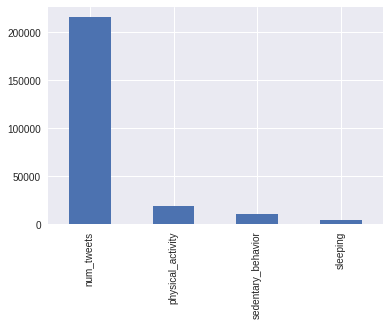

In [8]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'num_tweets':].sum().plot(kind='bar')

In [14]:
regions_df.head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
#FNLROM at Royal Ontario Museum,NaN,NaN,1.0,0.0,0.0,0.0
#Sadness,NaN,NaN,1.0,0.0,0.0,1.0
10 Dundas East,NaN,NaN,1.0,0.0,0.0,0.0
100 Bay Street South,NaN,NaN,1.0,0.0,0.0,0.0
1010 Bistro,NaN,NaN,1.0,0.0,0.0,0.0


In [ ]:
compute_geolocation_regions_geocoder(regions_df)